In [1]:
# style the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('http://bit.ly/1LC7EI7')
HTML(response.read().decode("utf-8"))

# Mixture of Gaussians

This is a simple concept - we create a mixture of Gaussians as a weighted sum of a set of Gaussians:

$$p(x) = \sum\limits_{k=1}^N w_k \mathcal{N}(\mu_k, \sigma_k^2)$$

with the constraint that the weights are all positive and sum to one: $\sum\limits_{k=1}^N w_k=1$.

Here is some code to visualize this for 1D Gaussians

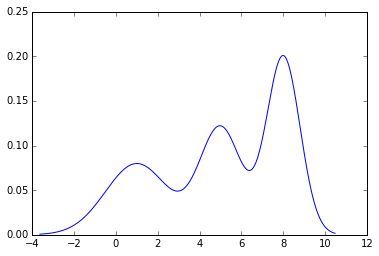

In [45]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_mog(gaussians, weights):
    ys = []
    
    # find range for x
    min_x, max_x = 1e308, -1e308
    for g in gaussians:
        min_x = min(min_x, norm.ppf(.001, g[0], g[1]))
        max_x = max(max_x, norm.ppf(.999, g[0], g[1]))
        
    xs = np.linspace(min_x, max_x, 500)
    ys = np.zeros(len(xs))
    for g, w in zip(gaussians, weights):
        ys += w * norm.pdf(xs, loc=g[0], scale=g[1])
        
    plt.plot(xs, ys)

gaussians = [[1, 1.5], 
             [5, 1],
             [8, .8]]

weights = [.3, .3, .4]

plot_mog(gaussians, weights)